In [ ]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0
!pip install hyperopt
!pip install --upgrade xgboost
!pip install eli5
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.2 MB/s 
     |████████████████████████████████| 303 kB 50.6 MB/s 
     |████████████████████████████████| 690 kB 33.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 102 kB 10.6 MB/s 
     |████████████████████████████████| 3.1 MB 43.4 MB/s 
     |████████████████████████████████| 296 kB 47.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5f0d51a56f263c8f9efacf06c3699ab0000506a0cbda1115aab60d54634d1f3c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing instal

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,472 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score ,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder ,CountEncoder ,OrdinalEncoder
from xgboost import XGBClassifier

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import files
files.upload();

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
aus_location = ['Moree','Albury','Mildura','Canberra','Sydney','Newcastle','Wollongong','SydneyAirport']
df1 = df[df['Location'].isin(aus_location)]#호주 데이터중에서 사우스 웨일즈 지역을 사용할것이기 때문에 

In [ ]:
#밀재배 시기인 5월에서 10월까지 데이터만 사용하기위해 자르기 
df1 = df1.reset_index(drop = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Datemonth'] = df1['Date'].dt.month
drop12 = df1[(df1['Datemonth']<5) | (df1['Datemonth']>10)].index
df1 = df1.drop(index = drop12).reset_index(drop = True)

In [ ]:
def temp(df):
  dfg = df.fillna(df.mean())
  dfg = dfg.round()

  return dfg

In [ ]:
#평균 온도 만들기 
df1['MaxTemp'] = temp(df1['MaxTemp'])
df1['MinTemp'] = temp(df1['MinTemp'])
df1['MeanTemp'] = ((df1['MaxTemp'] + df1['MinTemp'])/2).round().astype('int')

In [ ]:
#오늘 비내림과 내일 비올확률 에대한 전처리
df1 = df1.dropna(subset = ['RainToday','RainTomorrow']);
df1['RainToday'] = df1['RainToday'].replace('No',0).replace('Yes',1).astype('int');
df1['RainTomorrow'] = df1['RainTomorrow'].replace('No',0).replace('Yes',1).astype('int');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
round(df1.isnull().sum()/len(df1),2).sort_values()# 결측치가많은 것을 drop하기 위해 확인 

Date             0.00
RainTomorrow     0.00
RainToday        0.00
Datemonth        0.00
MeanTemp         0.00
Location         0.00
MinTemp          0.00
Rainfall         0.00
MaxTemp          0.00
Temp9am          0.01
Humidity9am      0.01
WindSpeed9am     0.02
Temp3pm          0.03
Humidity3pm      0.04
WindSpeed3pm     0.05
WindDir3pm       0.07
Pressure9am      0.13
Pressure3pm      0.13
WindDir9am       0.13
WindGustSpeed    0.18
WindGustDir      0.18
Cloud9am         0.22
Cloud3pm         0.25
Evaporation      0.46
Sunshine         0.47
dtype: float64

In [ ]:
df1.nunique()#Cardinality확인 

Date             1712
Location            8
MinTemp            31
MaxTemp            35
Rainfall          278
Evaporation       129
Sunshine          130
WindGustDir        16
WindGustSpeed      58
WindDir9am         16
WindDir3pm         16
WindSpeed9am       39
WindSpeed3pm       40
Humidity9am        93
Humidity3pm        99
Pressure9am       428
Pressure3pm       422
Cloud9am           10
Cloud3pm            9
Temp9am           290
Temp3pm           307
RainToday           2
RainTomorrow        2
Datemonth           6
MeanTemp           29
dtype: int64

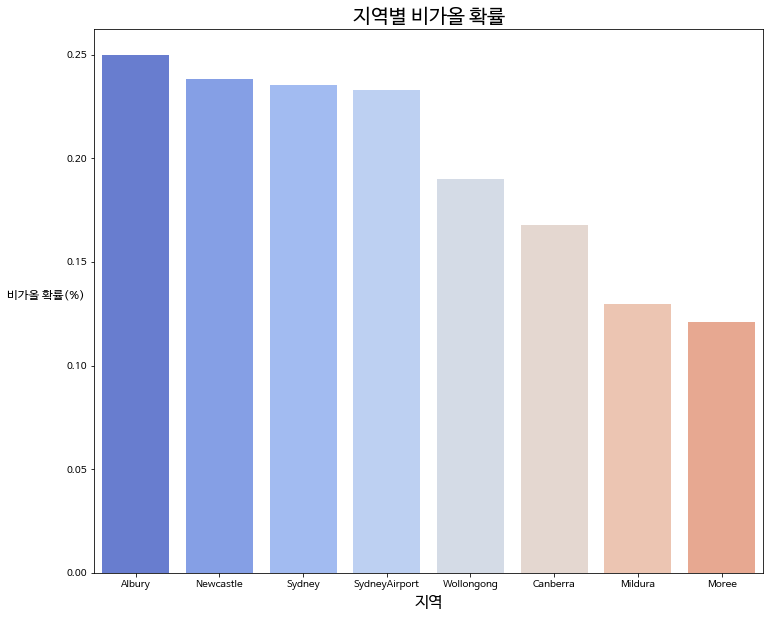

In [ ]:
tt  = df1.groupby('Location')['RainToday'].mean().sort_values(ascending=False).reset_index();

#가설 1 뉴사우스 웨일즈내에서도  지역별로 비가올확률이 다를 것이다 

plt.figure(figsize=(12,10))
palette1 = sns.color_palette('coolwarm',10)
sns.barplot(data=tt, x='Location', y='RainToday',palette = palette1)
plt.xlabel('지역',fontsize = 16)
plt.ylabel('비가올 확률(%)',rotation=0,fontsize = 12,labelpad=20)
plt.title('지역별 비가올 확률',fontsize = 20);

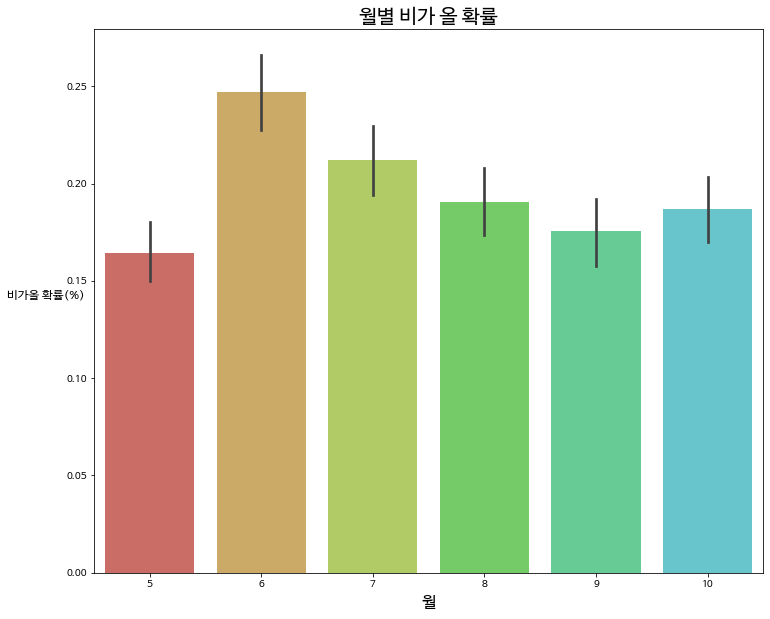

In [ ]:
# 가설 2 월별로 비가올 확률에 차이가 있을 것이다 

plt.figure(figsize=(12,10))
palette2 = sns.color_palette('hls',10)
sns.barplot(data=df1, x='Datemonth', y='RainToday',palette = palette2)
plt.xlabel('월',fontsize = 16)
plt.ylabel('비가올 확률(%)',rotation=0,fontsize = 12,labelpad=20)
plt.title('월별 비가 올 확률',fontsize = 20);

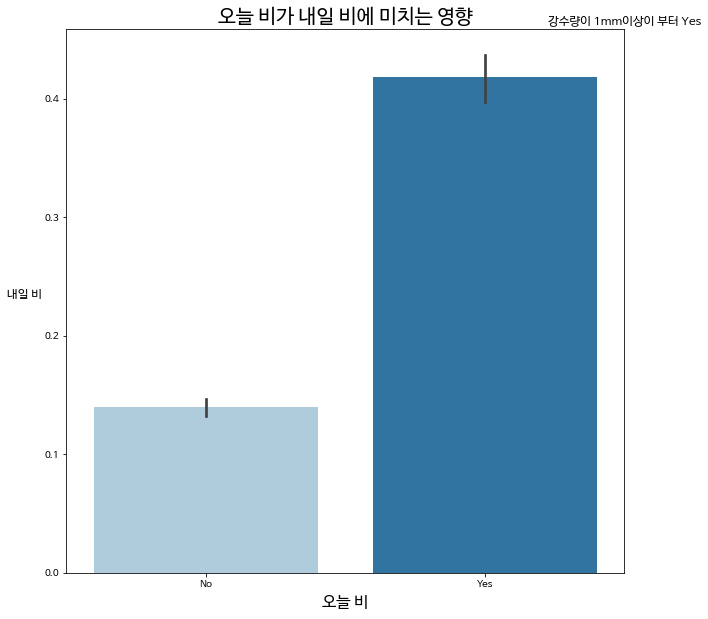

In [ ]:
#그래프 만들기위한 전처리

dfk = df1['RainToday']
dfk = pd.DataFrame(dfk)
dfk['RainTomorrow'] = df1['RainTomorrow']
dfk['RainToday'] = dfk['RainToday'].replace(0,'No').replace(1,'Yes')

# 가설 4 오늘 비가오면 내일 비올 확률이 높을 것이다 

plt.figure(figsize=(10,10))
palette4 = sns.color_palette('Paired',10)
sns.barplot(data=dfk, x='RainToday', y='RainTomorrow',palette = palette4)
plt.suptitle('강수량이 1mm이상이 부터 Yes',position=(0.9, 0.9))
plt.xlabel('오늘 비',fontsize = 16)
plt.ylabel('내일 비',rotation=0,fontsize = 12,labelpad=20)
plt.title('오늘 비가 내일 비에 미치는 영향',fontsize = 20);

In [ ]:
df1.shape

(12327, 13)

In [ ]:
#결측치 및 이상치 제거 
#이상치는 평균온도 그래프에서 27도넘는 것을 제거 (갑자기 너무 튀는 값이 나왔기 때문)


In [ ]:
jk  = df1[df1['MeanTemp'] >= 27].index
df1 = df1.drop(jk)

In [ ]:
#Min temp,#평균온도로 계산할것이기 떄문에 drop
#Max temp,#평균온도로 계산할것이기 떄문에 drop
#Date, #월별로 나누놨기 때문에 drop
#Rainfall, #오늘 비가 내린것에서 이미 1mm이상 비가 올경우Yes로 계산하기 때문에 상관관계을 가짐
#Evaporation,#너무 많은 결측치 
#Sunshine,#너무 많은 결측치 
#Temp9am,#온도는 그날의 평균온도로 계산 할것임
#Temp3pm,#온도는 그날의 평균온도로 계산 할것임

In [ ]:
def time(a,b):
  a = a.fillna(a.mean())
  b = b.fillna(b.mean())
  c = ((a+b)/20).round().astype('int')
  return c

In [ ]:
def time1(a,b):
  a = a.fillna(a.mean())
  b = b.fillna(b.mean())
  c = ((a+b)/2).round().astype('int')
  return c

In [ ]:
df1['WindSpeed'] = time(df1['WindSpeed9am'],df1['WindSpeed3pm'])
df1['Humidity'] = time(df1['Humidity9am'],df1['Humidity3pm'])
df1['Pressure'] = time(df1['Pressure9am'],df1['Pressure3pm'])
df1['Cloud'] = time1(df1['Cloud9am'],df1['Cloud3pm'])
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].mean())
df1['WindGustSpeed'] = (df1['WindGustSpeed']/10).round()

In [ ]:
df1.drop(['MinTemp','MaxTemp','Date','Rainfall','Evaporation',
          'Sunshine','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm'
          ,'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'],axis = 1,inplace = True)

In [ ]:
df1.nunique()

Location          8
WindGustDir      16
WindGustSpeed    13
WindDir9am       16
WindDir3pm       16
RainToday         2
RainTomorrow      2
Datemonth         6
MeanTemp         26
WindSpeed         9
Humidity         11
Pressure          6
Cloud             9
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12327 entries, 0 to 12590
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       12327 non-null  object 
 1   WindGustDir    10061 non-null  object 
 2   WindGustSpeed  12327 non-null  float64
 3   WindDir9am     10731 non-null  object 
 4   WindDir3pm     11404 non-null  object 
 5   RainToday      12327 non-null  int64  
 6   RainTomorrow   12327 non-null  int64  
 7   Datemonth      12327 non-null  int64  
 8   MeanTemp       12327 non-null  int64  
 9   WindSpeed      12327 non-null  int64  
 10  Humidity       12327 non-null  int64  
 11  Pressure       12327 non-null  int64  
 12  Cloud          12327 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.3+ MB


In [ ]:
train_tr, test = train_test_split(
    df1, train_size=0.80, test_size=0.20, random_state=42
)

train, val = train_test_split(
    train_tr, train_size=0.80, test_size=0.20, random_state=42
)

In [ ]:
target = 'RainTomorrow'
features = df1.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((7888, 12), (7888,), (1973, 12), (1973,), (2466, 12), (2466,))

In [ ]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = roc_auc_score(y_train, baseline)
print(f'기준모델의 roc_auc는 {baseline_acc.round(2)} 입니다')

기준모델의 roc_auc는 0.5 입니다


In [ ]:
y_true0 = y_train.value_counts()[0]
y_true1 = y_train.value_counts()[1]
fn = len(y_train) - y_true0
base = pd.DataFrame(index = ['N0', 'Yes'], data = {'RainTomorrow No':[y_true0, fn], 'RainTomorrow Yes':[0,0]})

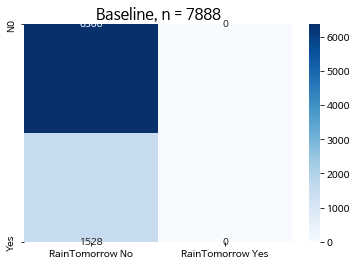

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Baseline, n = {len(y_train)}', fontsize=15)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(
        random_state=42,
    )
    
)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    
    )
)

In [ ]:
from xgboost import XGBClassifier

pipe3 = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='mean'),
    XGBClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
)

In [ ]:
pipe1.fit(X_train,y_train)
pipe2.fit(X_train,y_train)
pipe3.fit(X_train,y_train)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['Location', 'WindGustDir', 'WindDir9am',
                                     'WindDir3pm'])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamm...pu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()

In [ ]:
 x_val_1 = pipe1.predict(X_val)
 x_val_2 = pipe2.predict(X_val)
 x_val_3 = pipe3.predict(X_val)

In [ ]:
def score(a,b):
  accuracy = accuracy_score(a, b)
  roc_auc = roc_auc_score(a,b)
  f1 = f1_score(a, b)
  return print(f'정확도 = {accuracy.round(3)}'),print(f'f1 score = {f1.round(3)}'),print(f'roc_auc = {roc_auc.round(3)}')

In [ ]:
score(y_val, x_val_1),score(y_val, x_val_2),score(y_val, x_val_3);

정확도 = 0.773
f1 score = 0.434
roc_auc = 0.647
정확도 = 0.837
f1 score = 0.481
roc_auc = 0.665
정확도 = 0.831
f1 score = 0.514
roc_auc = 0.687


In [ ]:
ool = pd.DataFrame({'score':['정확도','f1 score','roc_auc'],
                    'baseline':['0.806','0.0','0.5'],
                    'DecisionTreeClassifier':['0.773','0.434','0.647'],
                    'RandomForestClassifier':['0.837','0.481','0.665'],
                    'XGBClassifier':['0.831','0.514','0.687'],
                    'xgb 튜닝후':['0.837','0.613','0.775']})
ool

,score,baseline,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,xgb 튜닝후
0,정확도,0.806,0.773,0.837,0.831,0.837
1,f1 score,0.0,0.434,0.481,0.514,0.613
2,roc_auc,0.5,0.647,0.665,0.687,0.775


In [ ]:
정확도 = 0.837
f1 score = 0.613
roc_auc = 0.775

In [ ]:
score(y_train, baseline)

정확도 = 0.806
f1 score = 0.0
roc_auc = 0.5


(None, None, None)

In [ ]:
#제일 점수가 잘나온 xgboost로 모델을 만들기로 결정

In [ ]:
params = {
       "xgbclassifier__max_depth": [2, 3, 4],
       "xgbclassifier__scale_pos_weight": [2.5, 3, 3.5],
       "xgbclassifier__min_child_weight": [4,8,16],
       "xgbclassifier__subsample": [0.7,0.8,0.9],
       "xgbclassifier__learning_rate": [0.07,0.09,0.11]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(
    pipe3,
    param_distributions=params,
    scoring="f1",
    cv=5,
    n_iter=100,
    random_state=42
)

In [ ]:
clf.fit(X_train,y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWar

In [ ]:
clf.best_params_,clf.best_score_

({'xgbclassifier__subsample': 0.9,
  'xgbclassifier__scale_pos_weight': 2.5,
  'xgbclassifier__min_child_weight': 8,
  'xgbclassifier__max_depth': 3,
  'xgbclassifier__learning_rate': 0.07},
 0.6082906173588976)

In [ ]:
x_val_clf = clf.predict(X_val)

In [ ]:
score(y_val,x_val_clf)

정확도 = 0.82
f1 score = 0.579
roc_auc = 0.745


(None, None, None)

In [ ]:
pipe4 = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='mean'),
    XGBClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        subsample = 0.9,
        scale_pos_weight = 2.5,
        min_child_weight = 8,
        max_depth = 3,
        learning_rate = 0.07
    )
)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
pipe4.fit(X_train,y_train)
x_val_4 = pipe4.predict(X_val)
score(y_val,x_val_4)

정확도 = 0.82
f1 score = 0.579
roc_auc = 0.745


(None, None, None)

In [ ]:
#테스트 셋에 적용 시키기 
x_test_4 = pipe4.predict(X_test)
score(y_test,x_test_4)

정확도 = 0.837
f1 score = 0.613
roc_auc = 0.775


(None, None, None)

In [ ]:
#하이퍼 파라미터 튜닝 완료 

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3
    )
)

In [ ]:
pipe.fit(X_train,y_train);

In [ ]:
import eli5

In [ ]:
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps["randomforestclassifier"], 
    scoring="f1", 
    n_iter=10,
    random_state=42,
)

X_train_preprocessed = pipe[0].transform(X_train)
permuter.fit(X_train_preprocessed, y_train)

PermutationImportance(estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                       random_state=42),
                      n_iter=10, random_state=42, scoring='f1')

In [ ]:
feature_names = X_train.columns.tolist()

In [ ]:
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

In [ ]:
eli5.show_weights(
    permuter,
    top=None, 
    feature_names=feature_names,  
)

Weight,Feature
0.2411 ± 0.0150,Humidity
0.2149 ± 0.0147,Cloud
0.1249 ± 0.0147,RainToday
0.0183 ± 0.0094,Pressure
0.0101 ± 0.0073,WindGustSpeed
0.0035 ± 0.0020,MeanTemp
0.0022 ± 0.0026,WindGustDir
0.0012 ± 0.0068,Location
0.0005 ± 0.0020,WindDir3pm
-0.0008 ± 0.0038,WindSpeed


In [ ]:
pi

Humidity         0.241077
Cloud            0.214869
RainToday        0.124940
Pressure         0.018315
WindGustSpeed    0.010065
MeanTemp         0.003468
WindGustDir      0.002221
Location         0.001226
WindDir3pm       0.000535
WindSpeed       -0.000787
Datemonth       -0.001288
WindDir9am      -0.005339
dtype: float64

In [ ]:
#상위 특성 3개에 대한 pdp진행

In [ ]:
dataset_pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='mean'),
)

model_pipe = XGBClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        subsample = 0.9,
        scale_pos_weight = 2.5,
        min_child_weight = 8,
        max_depth = 3,
        learning_rate = 0.07
    )

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
dataset_pipe.fit(X_train,y_train)
X_test_data = dataset_pipe.transform(X_test)
X_train_data = dataset_pipe.transform(X_train)
model_pipe.fit(X_train_data,y_train);
X_test_data_df = pd.DataFrame(X_test_data,columns = X_test.columns)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2def7ca90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2dee496d0>})

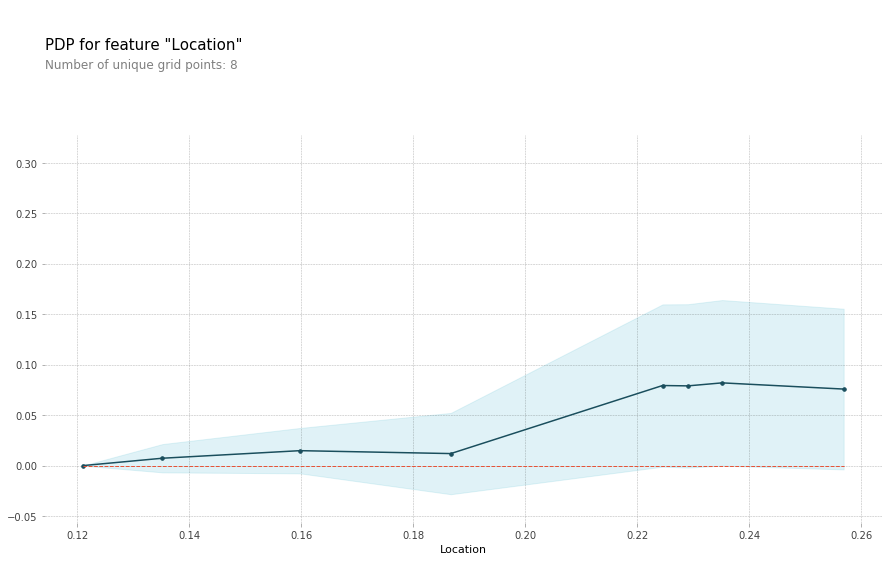

In [ ]:
target_feature = "Location"
isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    feature=target_feature,
    grid_type="percentile",  
    num_grid_points=10, 
)

pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd344a5fad0>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd344a2fbd0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd344ebb890>}})

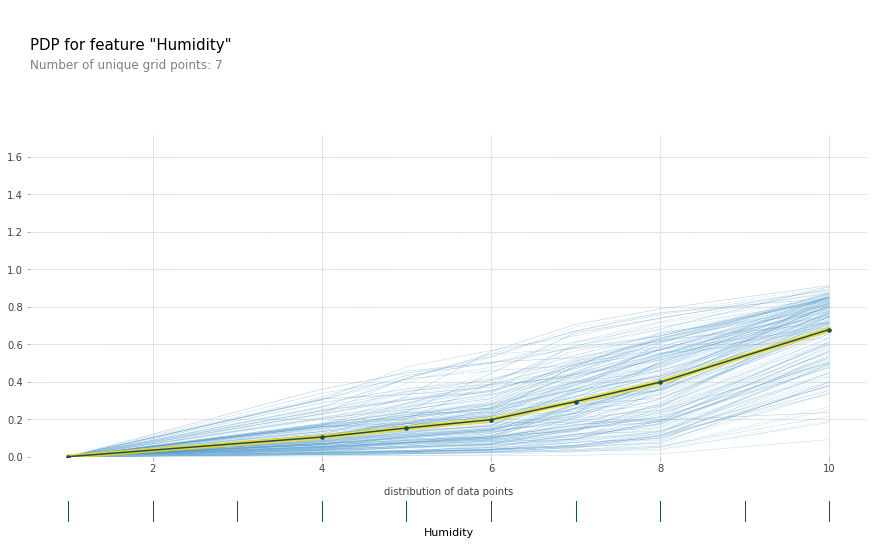

In [ ]:
target_feature = "Humidity"
isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    feature=target_feature,
    grid_type="percentile",  
    num_grid_points=10, 
)
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  
    frac_to_plot=200,  
    plot_pts_dist=True,
)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2e0a44cd0>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2e07d3fd0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2e0a44f90>}})

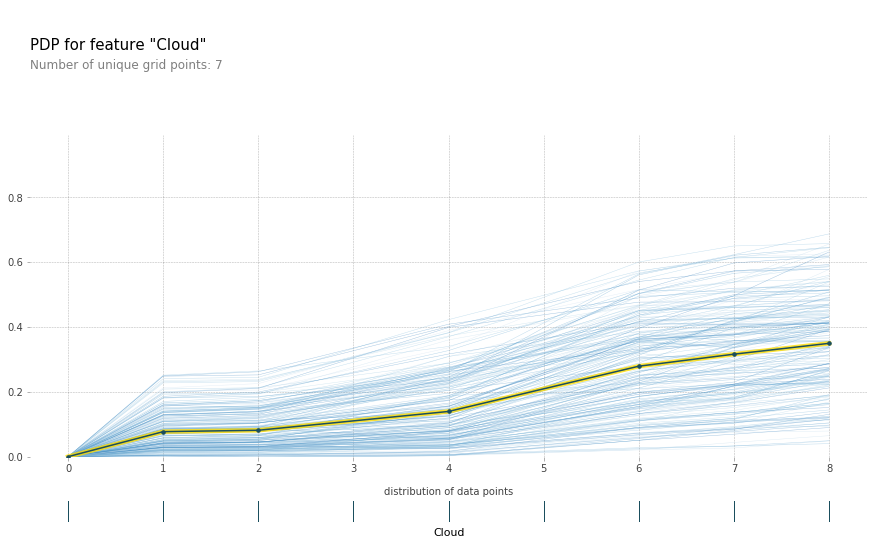

In [ ]:
target_feature = 'Cloud'

isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    feature=target_feature,
    grid_type="percentile",  
    num_grid_points=10, )
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  
    frac_to_plot=200,  
    plot_pts_dist=True,
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2df8b8e50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2df50dd90>})

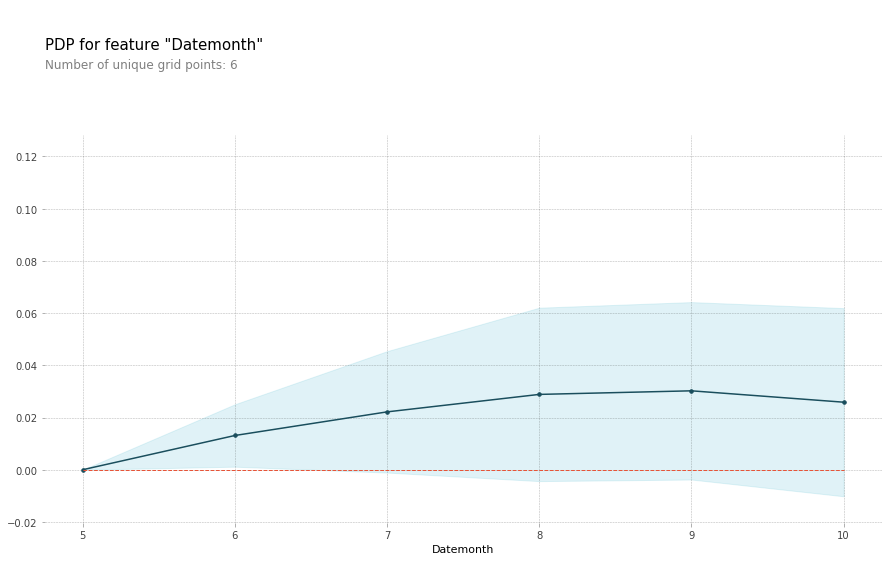

In [ ]:

target_feature = 'Datemonth'
isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    feature=target_feature,
    grid_type="percentile",  
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2dffc0b90>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2dfff0390>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2dffc0f50>}})

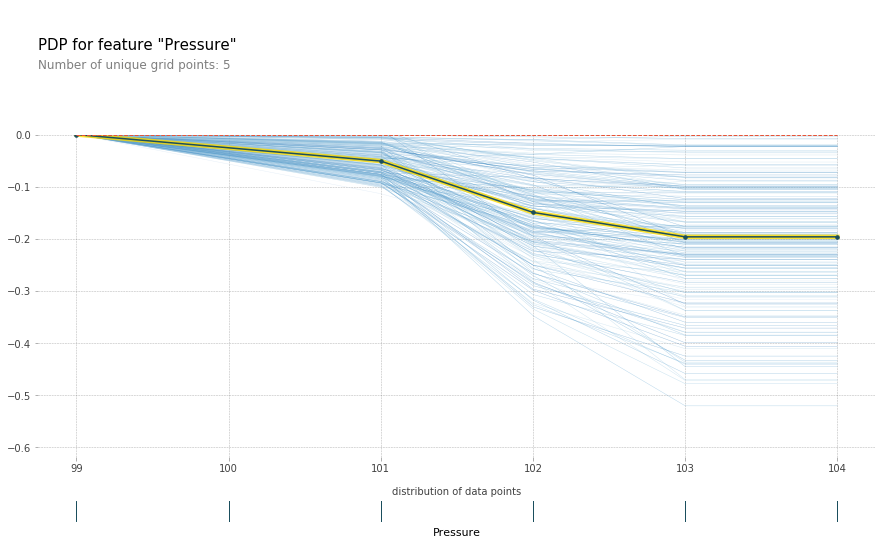

In [ ]:
target_feature = 'Pressure'
isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    feature=target_feature,
    grid_type="percentile",  
    num_grid_points=10, 
)
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  
    frac_to_plot=200,  
    plot_pts_dist=True,
)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2df1a36d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2def666d0>})

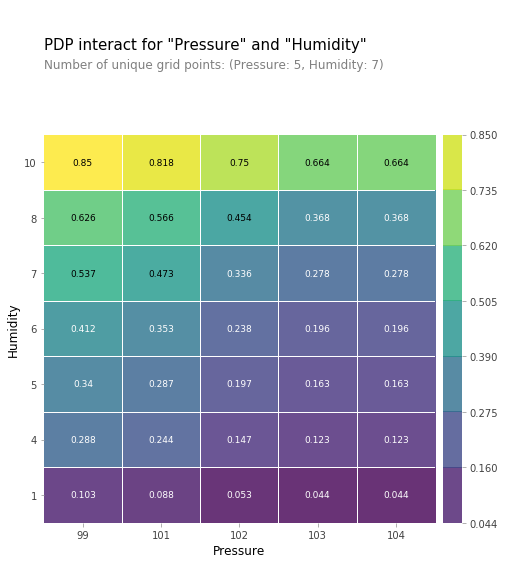

In [ ]:
target_features = ["Pressure", "Humidity"]

interaction = pdp_interact(
    model=model_pipe,
    dataset=X_test_data_df,
    model_features=X_test_data_df.columns,
    features=target_features,
)

pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)